# Ex 1

Un site web doreşte să prezică rata zilnică p a utilizatorilor care finalizează o achiziţie. Se observă date zilnice privind numărul k de utilizatori care finalizează achiziţia şi numărul total n de vizitatori zilnici (astfel, p = k/n), timp de o săptămână. Observaţiile sunt:

* Ziua 1: k = 10, n = 100;

* Ziua 2: k = 15, n = 120;

* Ziua 3: k = 20, n = 150;

* Ziua 4: k = 5, n = 90;

* Ziua 5: k = 25, n = 200;

* Ziua 6: k = 12, n = 110;

* Ziua 7: k = 18, n = 130.

Dorim să estimăm rata pentru fiecare zi a săptămânii, dar şi rata medie. Presupunem că:

* rata zilnică p urmează o distribuţie Beta(α = 2, β = 2), care reflectă o preferinţă uşoară pentru valori apropiate
de 0.5, iar

* pentru fiecare zi, numărul de utilizatori care finalizează achiziţia ki este modelat ca o variabilă binomială:

$$ki ∼ Binomial(n_i, p_i),$$

unde ni este numărul total de utilizatori în ziua i.

a) Definiţi un model în PyMC care sa descrie contextul de mai sus.

b) Estimaţi distribuţia a posteriori pentru fiecare pi, dar şi pentru rata medie globală $pmean = \frac{1}{7}(p1 + . . . + p7).$

Output()

Output()

Rezumatul distributiilor a posteriori:
         mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p[0]    0.12  0.03    0.06     0.17        0.0      0.0   6009.65   2846.63   
p[1]    0.14  0.03    0.08     0.19        0.0      0.0   7771.04   2966.83   
p[2]    0.14  0.03    0.09     0.19        0.0      0.0   6554.79   2827.47   
p[3]    0.07  0.03    0.03     0.13        0.0      0.0   6208.10   2682.95   
p[4]    0.13  0.02    0.09     0.18        0.0      0.0   6397.20   3016.45   
p[5]    0.12  0.03    0.07     0.18        0.0      0.0   7019.82   3079.56   
p[6]    0.15  0.03    0.10     0.21        0.0      0.0   6186.80   3099.89   
p_mean  0.12  0.01    0.11     0.15        0.0      0.0   5310.56   2915.67   

        r_hat  
p[0]      1.0  
p[1]      1.0  
p[2]      1.0  
p[3]      1.0  
p[4]      1.0  
p[5]      1.0  
p[6]      1.0  
p_mean    1.0  


array([[<Axes: title={'center': 'p\n0'}>,
        <Axes: title={'center': 'p\n1'}>,
        <Axes: title={'center': 'p\n2'}>,
        <Axes: title={'center': 'p\n3'}>],
       [<Axes: title={'center': 'p\n4'}>,
        <Axes: title={'center': 'p\n5'}>,
        <Axes: title={'center': 'p\n6'}>,
        <Axes: title={'center': 'p_mean'}>]], dtype=object)

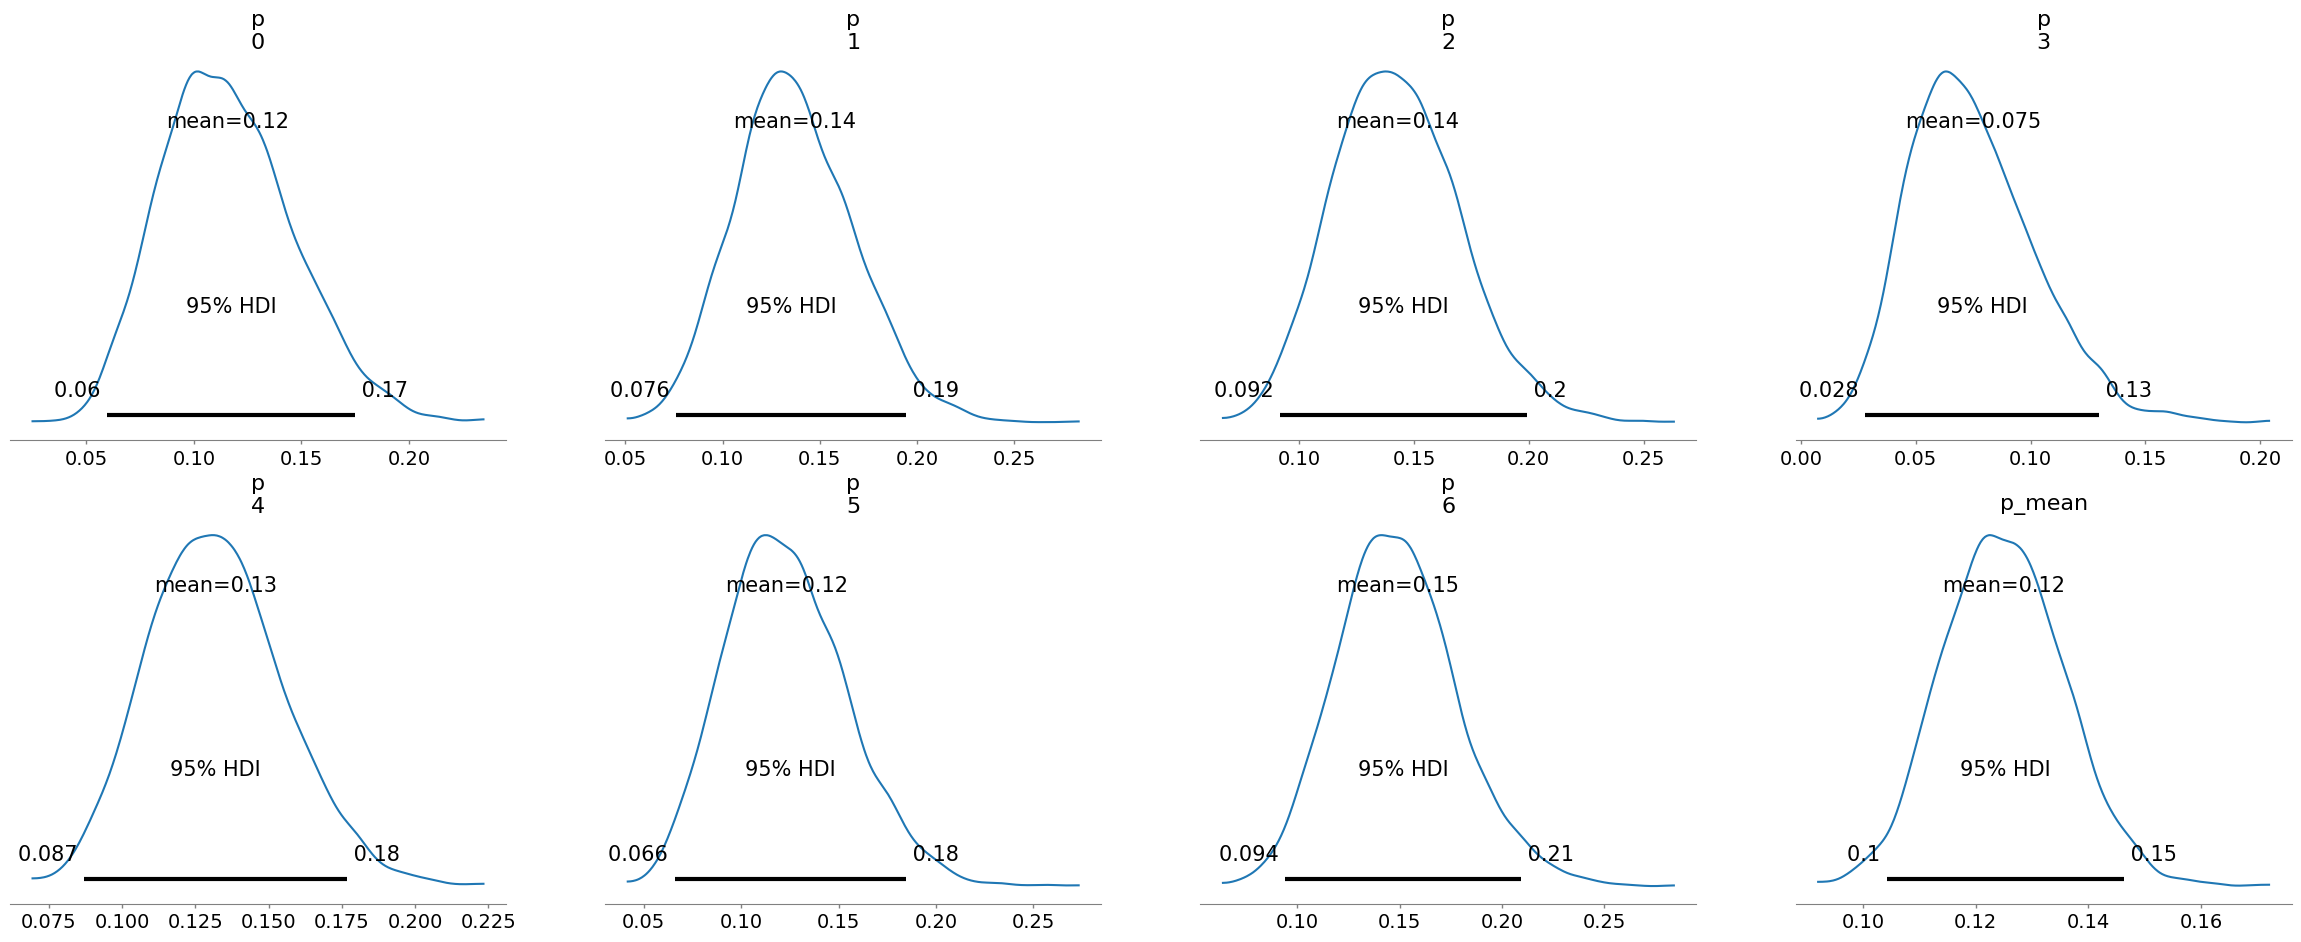

In [2]:
import pymc as pm
import numpy as np
import arviz as az

n_values = [100, 120, 150, 90, 200, 110, 130]
k_values = [10, 15, 20, 5, 25, 12, 18]

with pm.Model() as model:
    p = pm.Beta("p", alpha=2, beta=2, shape=7)

    k_obs = pm.Binomial("k_obs", n=n_values, p=p, observed=k_values)

    p_mean = pm.Deterministic("p_mean", pm.math.mean(p))

    trace = pm.sample(2000, chains=2, target_accept=0.95)

summary = az.summary(trace, var_names=["p", "p_mean"], round_to=2)
print("Rezumatul distributiilor a posteriori:\n", summary)

az.plot_posterior(trace, var_names=["p", "p_mean"], hdi_prob=0.95)


# Ex 2

Valorile de trafic (masini/min.) înregistrate de o camera in jurul unei anumite intersectii din oraş, într-o zi normală, sunt redate în fişierul trafic.scv (în fiecare minut, de la ora 4:00 până la 24:00). Presupunem că valorile respective sunt determinate de o distribuţie Poisson de parametru necunoscut λ > 0. Se ştie că modificări ale mediei traficului au loc în jurul orelor 7, 16 (creştere) şi 8, 19 (descreştere).

a) Definiţi un model probabilist care sa descrie contextul de mai sus, folosind PyMC.

b) Determinaţi capetele cele mai probabile ale celor 5 intervale de timp, cât şi cele mai probabile valori ale parametrului λ în acele intervale.

Saving trafic.csv to trafic (4).csv
   minut  nr. masini
0      1          13
1      2          11
2      3          11
3      4          10
4      5          19


Output()

Output()

<xarray.Dataset> Size: 176kB
Dimensions:   (chain: 2, draw: 2000)
Coordinates:
  * chain     (chain) int64 16B 0 1
  * draw      (draw) int64 16kB 0 1 2 3 4 5 6 ... 1994 1995 1996 1997 1998 1999
Data variables:
    lambda_1  (chain, draw) float64 32kB 12.17 12.22 11.76 ... 12.11 11.78 12.54
    lambda_2  (chain, draw) float64 32kB 17.73 17.92 16.22 ... 16.47 16.9 16.31
    lambda_3  (chain, draw) float64 32kB 13.09 12.97 13.28 ... 13.15 13.06 13.26
    lambda_4  (chain, draw) float64 32kB 14.47 14.53 14.56 ... 13.98 13.88 14.68
    lambda_5  (chain, draw) float64 32kB 10.4 10.18 10.07 ... 10.0 10.1 10.1
Attributes:
    created_at:                 2024-11-10T09:11:52.511914+00:00
    arviz_version:              0.20.0
    inference_library:          pymc
    inference_library_version:  5.17.0
    sampling_time:              17.43978452682495
    tuning_steps:               1000
Capetele intervalelor de timp:
Interval 1: Ora 4:00 - 7:00, λ = 12.140799905495792
Interval 2: Ora 7:00 - 8:00

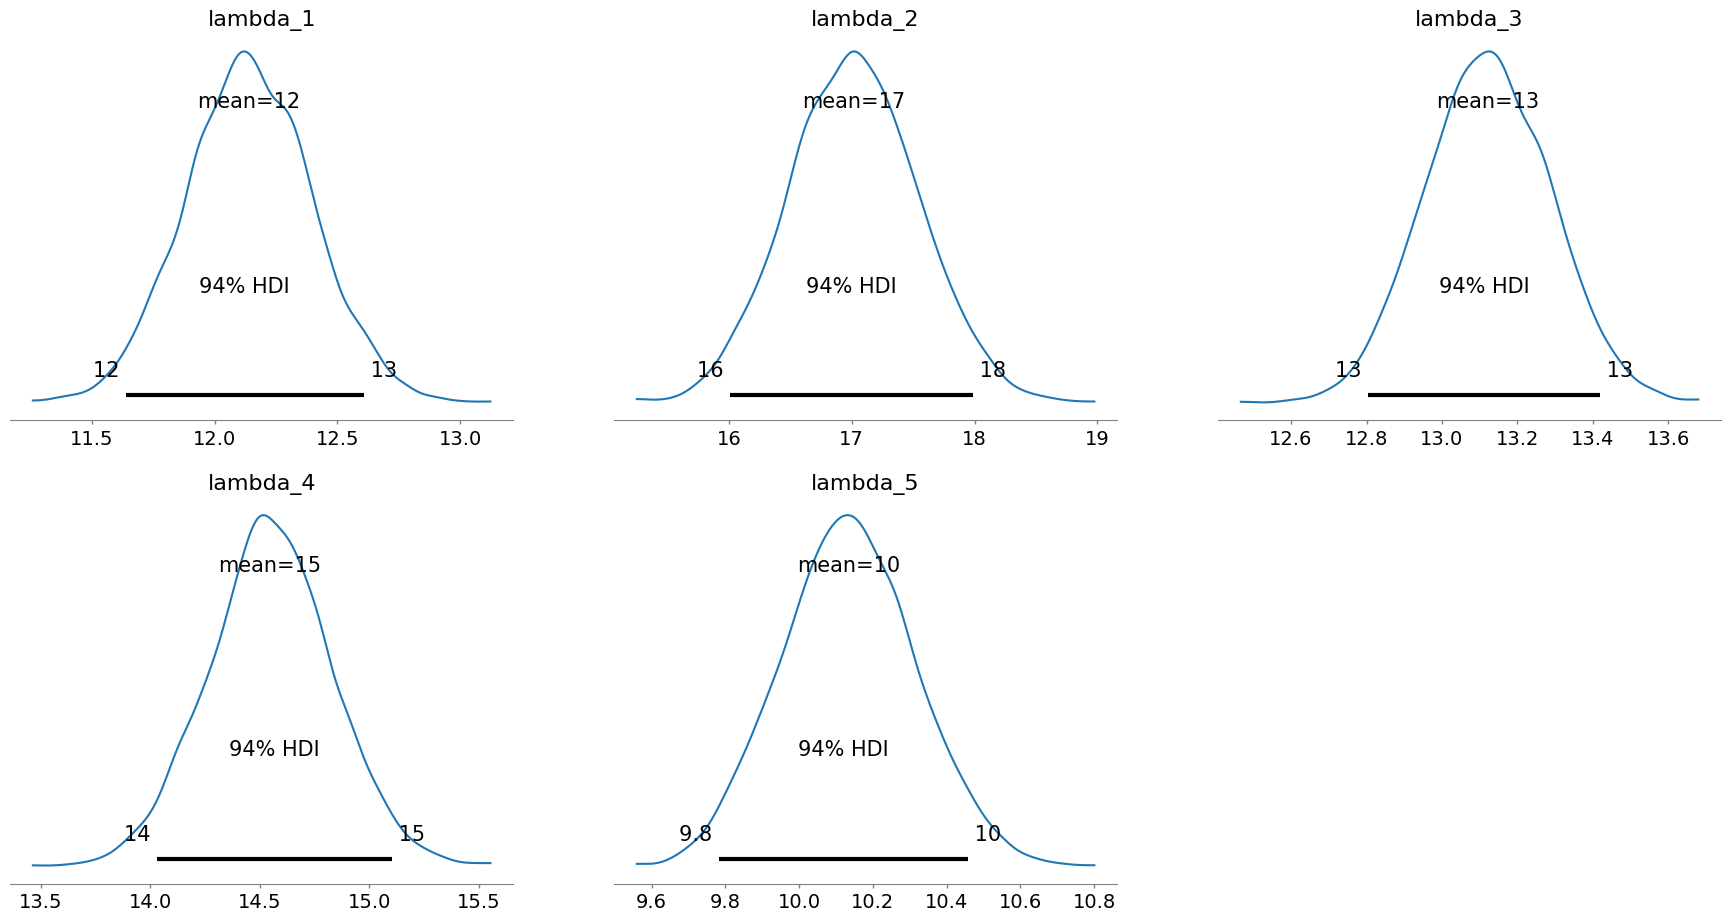

In [7]:
from google.colab import files
import pandas as pd
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

uploaded = files.upload()
data = pd.read_csv("trafic.csv")

print(data.head())

time_points = np.arange(4*60, 24*60)

with pm.Model() as model:
    lambda_1 = pm.Exponential("lambda_1", 1.0)
    lambda_2 = pm.Exponential("lambda_2", 1.0)
    lambda_3 = pm.Exponential("lambda_3", 1.0)
    lambda_4 = pm.Exponential("lambda_4", 1.0)
    lambda_5 = pm.Exponential("lambda_5", 1.0)

    rate = pm.math.switch(time_points < 7*60, lambda_1,
                          pm.math.switch(time_points < 8*60, lambda_2,
                          pm.math.switch(time_points < 16*60, lambda_3,
                          pm.math.switch(time_points < 19*60, lambda_4, lambda_5))))

    Y_obs = pm.Poisson("Y_obs", mu=rate, observed=data['nr. masini'])

    trace = pm.sample(2000, tune=1000, target_accept=0.9)

print(trace.posterior)

lambda_means = [trace.posterior['lambda_1'].mean().item(),
                trace.posterior['lambda_2'].mean().item(),
                trace.posterior['lambda_3'].mean().item(),
                trace.posterior['lambda_4'].mean().item(),
                trace.posterior['lambda_5'].mean().item()]

print("Capetele intervalelor de timp:")
print("Interval 1: Ora 4:00 - 7:00, λ =", lambda_means[0])
print("Interval 2: Ora 7:00 - 8:00, λ =", lambda_means[1])
print("Interval 3: Ora 8:00 - 16:00, λ =", lambda_means[2])
print("Interval 4: Ora 16:00 - 19:00, λ =", lambda_means[3])
print("Interval 5: Ora 19:00 - 24:00, λ =", lambda_means[4])

pm.plot_posterior(trace, var_names=["lambda_1", "lambda_2", "lambda_3", "lambda_4", "lambda_5"])
plt.show()
